**CSV** Write Time: 6.58s, Read Time: 1.57s

**PICKLE** Write Time: 0.05s, Read Time: 0.01s

**PARQUET** Write Time: 0.66s, Read Time: 0.57s

**FEATHER** Write Time: 0.18s, Read Time: 0.04s

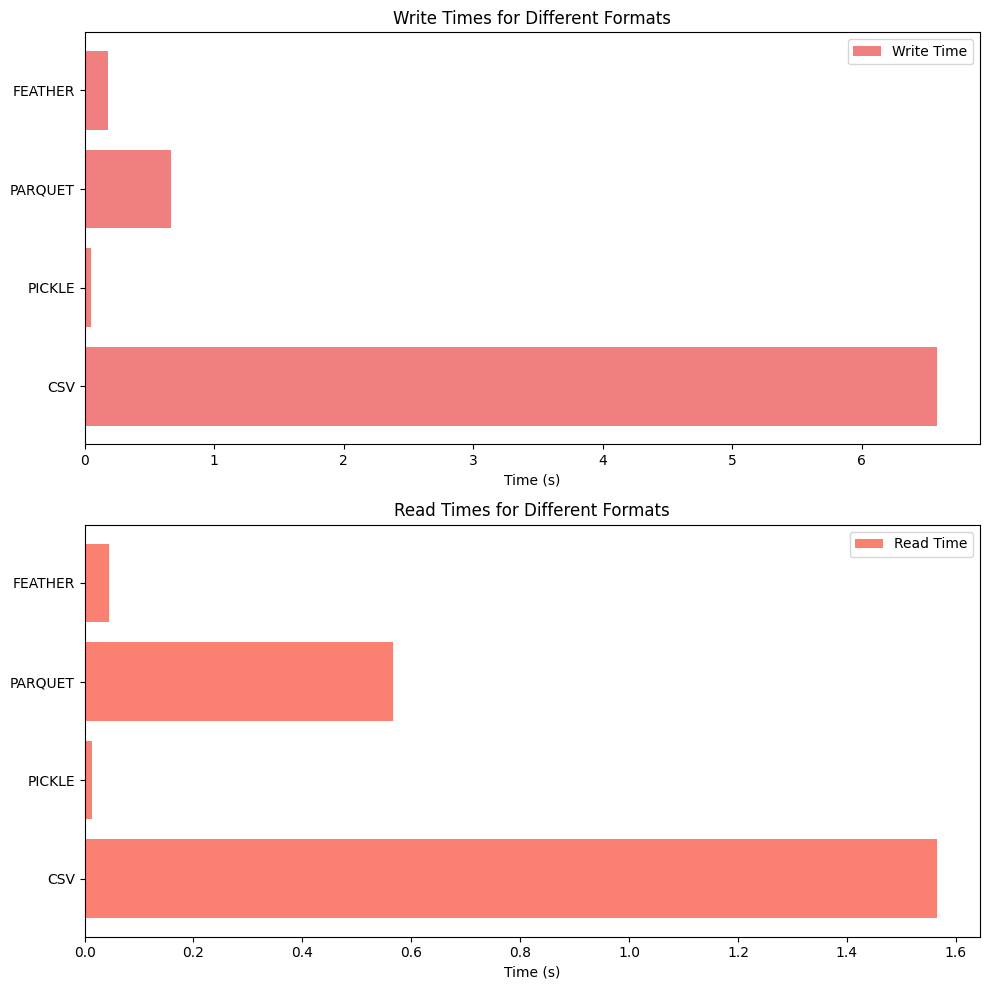

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import time

# Define the dataset creation function
def get_dataset(size):
    dates = pd.date_range('2021-01-01', '2023-12-31')
    return pd.DataFrame({
        'size': pd.Categorical(np.random.choice(['large', 'medium', 'small'], size)),
        'age': np.random.randint(1, 50, size).astype('int16'),
        'team': pd.Categorical(np.random.choice(['red', 'white', 'blue', 'gold'], size)),
        'win': np.random.choice([True, False], size),
        'date': np.random.choice(dates, size),
        'prob': np.random.uniform(0, 1, size).astype('float32')
    })

# Prepare an empty list to store the results for the table and chart
results = []

# Perform the I/O operations and time them
def perform_io_operations(df, file_type):
    file_name = f'test.{file_type}'
    
    # Timing write operation
    start_write = time.time()
    if file_type == 'csv':
        df.to_csv(file_name)
    elif file_type == 'pickle':
        df.to_pickle(file_name)
    elif file_type == 'parquet':
        df.to_parquet(file_name)
    elif file_type == 'feather':
        df.to_feather(file_name)
    end_write = time.time()
    write_time = end_write - start_write
    
    # Timing read operation
    start_read = time.time()
    if file_type == 'csv':
        _ = pd.read_csv(file_name)
    elif file_type == 'pickle':
        _ = pd.read_pickle(file_name)
    elif file_type == 'parquet':
        _ = pd.read_parquet(file_name)
    elif file_type == 'feather':
        _ = pd.read_feather(file_name)
    end_read = time.time()
    read_time = end_read - start_read
    
    # Display results immediately
    display(Markdown(f"**{file_type.upper()}** Write Time: {write_time:.2f}s, Read Time: {read_time:.2f}s"))
    
    # Store results for later use in table and chart
    results.append((file_type.upper(), write_time, read_time))

# Generate the dataset
df = get_dataset(5_000_000)

# Perform I/O operations for each file type
for file_type in ['csv', 'pickle', 'parquet', 'feather']:
    perform_io_operations(df, file_type)

# Convert the collected data into a DataFrame for visualization
timing_df = pd.DataFrame(results, columns=['Format', 'Write Time (s)', 'Read Time (s)'])

# Visualization
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Write Times
axs[0].barh(timing_df["Format"], timing_df["Write Time (s)"], color='lightcoral', label='Write Time')
axs[0].set_title('Write Times for Different Formats')
axs[0].set_xlabel('Time (s)')
axs[0].legend()

# Read Times
axs[1].barh(timing_df["Format"], timing_df["Read Time (s)"], color='salmon', label='Read Time')
axs[1].set_title('Read Times for Different Formats')
axs[1].set_xlabel('Time (s)')
axs[1].legend()

plt.tight_layout()
plt.show()